<a href="https://colab.research.google.com/github/vignoni/SynBio_Modeling/blob/main/Simulation_Gene_Expression_pyLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constitutive Expression

> This block defines a function for the system of ODE equations of genetic circuit. Then we find se solution intengrating the differential equation. 



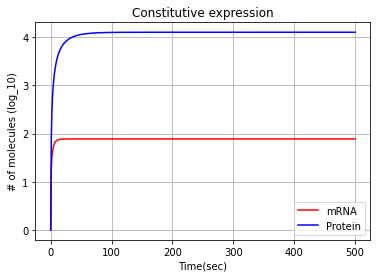

In [ ]:
from matplotlib.pylab import *
from scipy.integrate import odeint


# Constitutive expression model
def dndt_mc(n,t,param):

	# Biochemical species
	n1, n2, n3 = n

	# Model parameters
	CN, k1, k2, d1, d2, mu, Kmax = param

	# Diferential equations
	#n1 = mRNA
	dn1 = CN*k1-(d1+mu)*n1;
	#n2 = Protein
	dn2 = k2*n1- (d2+mu)*n2;
	#n3 = Number of cells
	dn3 = mu*n3*(1.-n3/Kmax)

	dn = [dn1, dn2, dn3]

	return dn

############################################
# SOLVE MODEL
	# Growth rate [min-1]
mu = 0.0301 
	# Population growth capacity [cells]
Kmax = 10e8	
	#plasmid number  pACYC184 [17 copies/cell]  
CN = 17. 
	# mRNA degradation rate  [1/min]
d1 = log(2)/3
	# protein degradation rate [1/min]
d2 = 0.02 
	# translation rate  [1/min] 
k2 = 8.23 
	# transcription rate [1/min] 
k1 = 1.19 
param = [CN, k1, k2, d1, d2, mu, Kmax]
	
	# Time vector
time = arange(0.,501.,1.)

	# Initial conditions
n0 = [1.,1.,1.0e6]

	# Solve differential equations
n = odeint(dndt_mc,n0,time,args=(param,))


time = time.reshape(501, 1)
 
	##################################################################
	# PLOT SIMULATION RESULTS
f1 = figure()
plot(time, log10(n[:, [0]]), 'r-', label='mRNA')
plot(time, log10(n[:, [1]])  , 'b-', label='Protein')
#plot(time, log10(n[:, [2]])  , 'm-', label='Cells')
grid()
legend(loc='best')
xlabel('Time(sec)')
ylabel('# of molecules (log_10)')
title('Constitutive expression')
f1.savefig('Costitutive_expression.png')


# Gene expression regulated by transcription factors (TF)


In [ ]:
# TF Regulated expression model
def dndt_TF(n,t,param):
  # Biochemical species
  Prom, TF, Complex, mRNA, Prot, Cells = n

  # Model parameters
  CN, kon, koff,  k1, k2, d1, d2, mu, Kmax = param

  # n1 = Promoter
  dn1 = -kon* Prom * TF +koff * Complex
  # n2 = TF
  dn2 = -kon * Prom * TF +koff * Complex
  #x3 = PromoterTF
  dn3 = +kon * Prom * TF -koff * Complex
  #x4 = mRNA
  dn4 = Complex * k1- d1*mRNA
  #x5 = Protein
  dn5 = k2 * mRNA -d2 * Prot
  #n6 = Number of cells
  dn6 = mu*Cells*(1.-Cells/Kmax)
  
  dn = [dn1, dn2, dn3, dn4, dn5, dn6]
  
  return dn

############################################
# SOLVE MODEL
	# Growth rate [min-1]
mu = 0.0301 
	# Population growth capacity [cells]
Kmax = 10e8	
	#plasmid number  pACYC184 [17 copies/cell]  
CN = 17. 
	# mRNA degradation rate  [1/min]
d1 = log(2)/3
	# protein degradation rate [1/min]
d2 = 0.02 
	# translation rate  [1/min] 
k2 = 8.23 
	# transcription rate [1/min] 
k1 = 1.19 
  #  Binding rate  [1/min] 
kon = 0.5       
  # Unbinding rate [1/min]
koff = 1 

param = [CN, kon, koff, k1, k2, d1, d2, mu, Kmax]
	
	# Time vector
final_time = 60*3.
time = arange(0.,final_time,0.01)

	# Initial conditions
n0 = [CN,25.,0.,0.,0.,1.0e6]

	# Solve differential equations
n = odeint(dndt_TF,n0,time,args=(param,))




# Transcription factor dynamics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


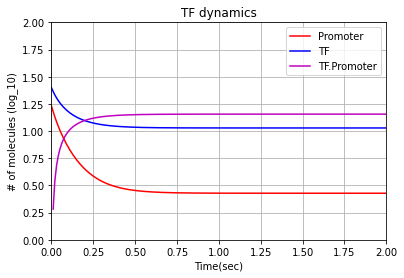

In [ ]:
	##################################################################
	# PLOT SIMULATION RESULTS
f2 = figure()
plot(time, log10(n[:, [0]]), 'r-', label='Promoter')
plot(time, log10(n[:, [1]])  , 'b-', label='TF')
plot(time, log10(n[:, [2]])  , 'm-', label='TF.Promoter')
grid()
legend(loc='best')
xlabel('Time(sec)')
xlim(0, 2)
ylim(0, 2)
ylabel('# of molecules (log_10)')
title('TF dynamics')
f2.savefig('TF_dynamics.png')

#  Protein expression dynamics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


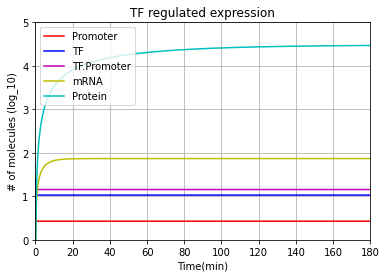

In [ ]:
	# PLOT SIMULATION RESULTS
f3 = figure()
plot(time, log10(n[:, [0]]), 'r-', label='Promoter')
plot(time, log10(n[:, [1]])  , 'b-', label='TF')
plot(time, log10(n[:, [2]])  , 'm-', label='TF.Promoter')
plot(time, log10(n[:, [3]]), '-y', label='mRNA')
plot(time, log10(n[:, [4]])  , 'c-', label='Protein')
grid()
legend(loc='best')
xlabel('Time(min)')
xlim(0, final_time)
ylim(0, 5)
ylabel('# of molecules (log_10)')
title('TF regulated expression')
f3.savefig('TF_expression.png')


# Protein expression with varying TF concentration

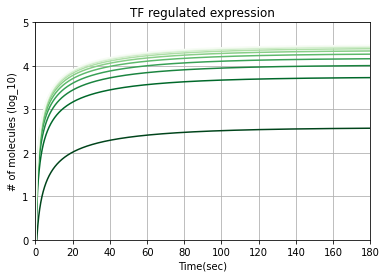

In [ ]:
values  = linspace(0.1, 25, 10)                          # TF initial concentration value
vcolors = cm.Greens_r(np.linspace(0., 1., len(values)))  # colors for each trajectory

f4 = figure()

#-------------------------------------------------------
# plot trajectories
for TF, col in zip(values, vcolors):
  # Initial conditions
  n0 = [CN,TF,0.1,0.1,0.1,1.0e6]

	# Solve differential equations
  n = odeint(dndt_TF,n0,time,args=(param,))
  plot( time, np.log10(n[:, [4]]), color=col, label='TF=(%.f)' % ( TF ) )

grid()
xlabel('Time(sec)')
xlim(0, final_time)
ylim(0, 5)
ylabel('# of molecules (log_10)')
title('TF regulated expression')
f4.savefig('TF_expression_final.png')

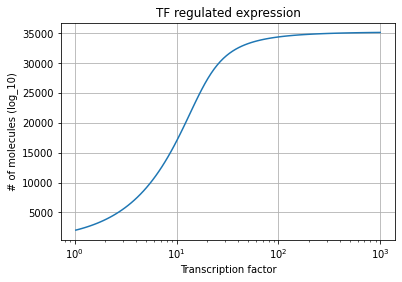

In [ ]:
f5 = figure()
values_ss  = logspace(0.01, 3, 100)
pc = []
for TF in values_ss:
  # Initial conditions
  n0 = [CN,TF,0.1,0.1,0.1,1.0e6]

	# Solve differential equations
  n = odeint(dndt_TF,n0,time,args=(param,))
  pc.append(n[-1, [4]])


semilogx( values_ss, pc )

grid()
xlabel('Transcription factor')
#xlim(0, values_ss[-1])
#ylim(0, pc[-1])
ylabel('# of molecules (log_10)')
title('TF regulated expression')
f5.savefig('TF_expression_final.png')
